In [2]:
import cv2
from matplotlib import pyplot as plt

In [4]:
for i in range(2):
    cap = cv2.VideoCapture(i)
    if cap.isOpened():
        print(f"Camera index {i} is available.")
        cap.release()
    else:
        print(f"Camera index {i} is not available.")

Camera index 0 is available.
Camera index 1 is not available.


In [19]:
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(1, cv2.CAP_DSHOW)

In [20]:
ret, frame = cap.read()

In [21]:
cap.read()

(True,
 array([[[206, 211, 195],
         [206, 211, 195],
         [206, 211, 195],
         ...,
         [210, 228, 229],
         [210, 228, 229],
         [208, 226, 227]],
 
        [[207, 212, 196],
         [204, 209, 193],
         [202, 206, 193],
         ...,
         [212, 227, 229],
         [208, 226, 227],
         [207, 225, 226]],
 
        [[204, 208, 195],
         [206, 210, 197],
         [206, 210, 197],
         ...,
         [214, 227, 229],
         [212, 227, 229],
         [212, 227, 229]],
 
        ...,
 
        [[119, 124, 115],
         [120, 125, 116],
         [118, 121, 112],
         ...,
         [ 82,  91,  90],
         [ 92, 103, 102],
         [114, 125, 124]],
 
        [[110, 118, 107],
         [113, 121, 110],
         [114, 120, 109],
         ...,
         [104, 115, 114],
         [105, 116, 116],
         [120, 131, 131]],
 
        [[109, 120, 106],
         [112, 123, 109],
         [113, 121, 110],
         ...,
         [101, 112, 1

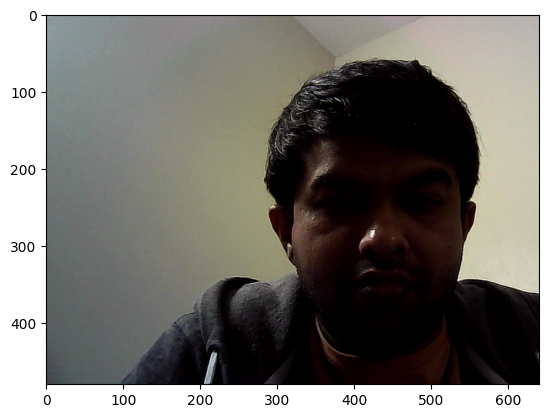

In [22]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
cap.release()

In [8]:
cap.read()

(False, None)

In [80]:
def take_photo():
    cap = cv2.VideoCapture(1)
    ret, frame = cap.read()
    cv2.imwrite('wcphoto.jpg', frame)
    cap.release()

In [81]:
take_photo()

In [144]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    
    cv2.imshow('Webcam', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [10]:
cap.release()

**Actual code start here**

In [147]:
%pip install -q mediapipe opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import mediapipe as mp
import cv2
import numpy as np
import uuid
import os

In [52]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [56]:
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

# Set the resolution to the maximum supported by your camera
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)  # Set width (e.g., 1280 for 720p)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)  # Set height (e.g., 720 for 720p)

True

In [57]:
with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        ret, frame = cap.read()

        # BGR to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # flip on horizontal
        image = cv2.flip(image, 1)
        # set flag
        image.flags.writeable = False
        # Detections
        results = hands.process(image)
        # set flag to True
        image.flags.writeable = True
        # RGB to BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        print(results)

        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, 
                                          mp_hands.HAND_CONNECTIONS,
                                          mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                          mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))
        
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [45]:
mp_drawing.DrawingSpec??

Init signature:
mp_drawing.DrawingSpec(
    color: Tuple[int, int, int] = (224, 224, 224),
    thickness: int = 2,
    circle_radius: int = 2,
) -> None
Docstring:      DrawingSpec(color: Tuple[int, int, int] = (224, 224, 224), thickness: int = 2, circle_radius: int = 2)
Source:        
@dataclasses.dataclass
class DrawingSpec:
  # Color for drawing the annotation. Default to the white color.
  color: Tuple[int, int, int] = WHITE_COLOR
  # Thickness for drawing the annotation. Default to 2 pixels.
  thickness: int = 2
  # Circle radius. Default to 2 pixels.
  circle_radius: int = 2
File:           d:\pycharmprojects\pro_dis_2\venv\lib\site-packages\mediapipe\python\solutions\drawing_utils.py
Type:           type
Subclasses:     

**code for hand gesture**

In [16]:
import cv2
import mediapipe as mp

# Initialize MediaPipe Hands and Drawing modules
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Initialize video capture
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

# Set the resolution to the maximum supported by your camera
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)  # Set width (e.g., 1280 for 720p)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)  # Set height (e.g., 720 for 720p)

def is_open_hand(hand_landmarks):
    """ Check if all fingers are extended (open hand) """
    for finger_tip, finger_pip in [
        (mp_hands.HandLandmark.INDEX_FINGER_TIP, mp_hands.HandLandmark.INDEX_FINGER_PIP),
        (mp_hands.HandLandmark.MIDDLE_FINGER_TIP, mp_hands.HandLandmark.MIDDLE_FINGER_PIP),
        (mp_hands.HandLandmark.RING_FINGER_TIP, mp_hands.HandLandmark.RING_FINGER_PIP),
        (mp_hands.HandLandmark.PINKY_TIP, mp_hands.HandLandmark.PINKY_PIP)
    ]:
        if hand_landmarks.landmark[finger_tip].y > hand_landmarks.landmark[finger_pip].y:
            return False  # A finger is not extended
    return True  # All fingers are extended

def is_closed_fist(hand_landmarks):
    """ Check if all fingers are folded (closed fist) """
    for finger_tip, finger_pip in [
        (mp_hands.HandLandmark.INDEX_FINGER_TIP, mp_hands.HandLandmark.INDEX_FINGER_PIP),
        (mp_hands.HandLandmark.MIDDLE_FINGER_TIP, mp_hands.HandLandmark.MIDDLE_FINGER_PIP),
        (mp_hands.HandLandmark.RING_FINGER_TIP, mp_hands.HandLandmark.RING_FINGER_PIP),
        (mp_hands.HandLandmark.PINKY_TIP, mp_hands.HandLandmark.PINKY_PIP)
    ]:
        if hand_landmarks.landmark[finger_tip].y < hand_landmarks.landmark[finger_pip].y:
            return False  # A finger is extended
    return True  # All fingers are folded

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert BGR to RGB and flip for mirror effect
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = cv2.flip(image, 1)
        image.flags.writeable = False  # Set to False for faster processing

        # Process the image and find hands
        results = hands.process(image)
        image.flags.writeable = True  # Set to True for drawing
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Check if hands are detected
        if results.multi_hand_landmarks:
            for num, hand_landmarks in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(
                    image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                    mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                    mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
                )

                # Gesture recognition logic
                if is_open_hand(hand_landmarks):
                    cv2.putText(image, "Open Hand Detected", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                elif is_closed_fist(hand_landmarks):
                    cv2.putText(image, "Closed Fist Detected", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # Display the image with results
        cv2.imshow('Hand Gesture Recognition', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

**code for video recording with hand gesture**

In [7]:
import cv2
import mediapipe as mp
import os

# Initialize MediaPipe Hands and Drawing modules
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Initialize video capture
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

# Set the resolution to the maximum supported by your camera
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)  # Set width (e.g., 1280 for 720p)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)  # Set height (e.g., 720 for 720p)

# Directory to save the video
output_dir = r'C:\Users\avikd\Videos\project_videos\Captured'
os.makedirs(output_dir, exist_ok=True)

# Variables to handle recording
recording = False
video_writer = None

# Set video codec and file format
fps = int(cap.get(cv2.CAP_PROP_FPS)) or 30  # Default to 30 if unable to read fps
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

def is_open_hand(hand_landmarks):
    """ Check if all fingers are extended (open hand) """
    for finger_tip, finger_pip in [
        (mp_hands.HandLandmark.INDEX_FINGER_TIP, mp_hands.HandLandmark.INDEX_FINGER_PIP),
        (mp_hands.HandLandmark.MIDDLE_FINGER_TIP, mp_hands.HandLandmark.MIDDLE_FINGER_PIP),
        (mp_hands.HandLandmark.RING_FINGER_TIP, mp_hands.HandLandmark.RING_FINGER_PIP),
        (mp_hands.HandLandmark.PINKY_TIP, mp_hands.HandLandmark.PINKY_PIP)
    ]:
        if hand_landmarks.landmark[finger_tip].y > hand_landmarks.landmark[finger_pip].y:
            return False  # A finger is not extended
    return True  # All fingers are extended

def is_closed_fist(hand_landmarks):
    """ Check if all fingers are folded (closed fist) """
    for finger_tip, finger_pip in [
        (mp_hands.HandLandmark.INDEX_FINGER_TIP, mp_hands.HandLandmark.INDEX_FINGER_PIP),
        (mp_hands.HandLandmark.MIDDLE_FINGER_TIP, mp_hands.HandLandmark.MIDDLE_FINGER_PIP),
        (mp_hands.HandLandmark.RING_FINGER_TIP, mp_hands.HandLandmark.RING_FINGER_PIP),
        (mp_hands.HandLandmark.PINKY_TIP, mp_hands.HandLandmark.PINKY_PIP)
    ]:
        if hand_landmarks.landmark[finger_tip].y < hand_landmarks.landmark[finger_pip].y:
            return False  # A finger is extended
    return True  # All fingers are folded

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        image_height, image_width, _ = frame.shape

        # Convert BGR to RGB and flip for mirror effect
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = cv2.flip(image, 1)
        image.flags.writeable = False  # Set to False for faster processing

        # Process the image and find hands
        results = hands.process(image)
        image.flags.writeable = True  # Set to True for drawing
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Check if hands are detected
        if results.multi_hand_landmarks:
            for num, hand_landmarks in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(
                    image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                    mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                    mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
                )

                # Gesture recognition logic
                if is_open_hand(hand_landmarks):
                    cv2.putText(image, "Open Hand Detected", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                    if not recording:
                        recording = True
                        video_name = "recording.mp4"  # Change this if needed for unique names
                        output_file = os.path.join(output_dir, video_name)
                        video_writer = cv2.VideoWriter(
                            output_file,
                            cv2.VideoWriter_fourcc(*'mp4v'),  # Codec for .mp4 format
                            fps,
                            (frame_width, frame_height)
                        )
                        if not video_writer.isOpened():
                            print("Error: Video writer failed to open.")
                            recording = False
                        else:
                            print("Recording started")

                elif is_closed_fist(hand_landmarks):
                    cv2.putText(image, "Closed Fist Detected", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                    if recording:
                        recording = False
                        if video_writer is not None:
                            video_writer.release()
                            print(f"Recording stopped and saved at: {output_file}")
                        video_writer = None  # Reset the writer

        # Write frame to the video if recording
        if recording and video_writer is not None:
            video_writer.write(frame)

        # Display the image with results
        cv2.imshow('Hand Gesture Recognition', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release resources
cap.release()
if video_writer is not None:
    video_writer.release()
cv2.destroyAllWindows()


Recording started
Recording stopped and saved at: C:\Users\avikd\Videos\project_videos\Captured\recording.mp4


In [1]:
cap.release()

NameError: name 'cap' is not defined

**code for live face detection**

In [ ]:
# import cv2
# import dlib
# import numpy as np
# import math
# from collections import deque
#
# # Load the pre-trained Dlib face detector and shape predictor
# detector = dlib.get_frontal_face_detector()
# predictor = dlib.shape_predictor(r"D:\PycharmProjects\pro_dis_2\models\shape_predictor_68_face_landmarks.dat")  # Update the path as necessary
#
# # Parameters for lip region processing
# LIP_HEIGHT = 80
# LIP_WIDTH = 112
#
# # Rolling buffer for smoothing lip ratio values
# lip_ratio_buffer = deque(maxlen=5)  # Adjust size for more/less smoothing
# baseline_ratio = None  # Will be dynamically set for each session
#
# # Video capture
# cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
#
# def detect_speaking(landmarks):
#     """
#     Calculate lip distance and determine if the person is speaking.
#     """
#     # Calculate distances between landmarks
#     upper_lip = (landmarks.part(51).x, landmarks.part(51).y)
#     lower_lip = (landmarks.part(57).x, landmarks.part(57).y)
#     left_lip = (landmarks.part(48).x, landmarks.part(48).y)
#     right_lip = (landmarks.part(54).x, landmarks.part(54).y)
#
#     # Vertical and horizontal distances
#     vertical_distance = math.hypot(upper_lip[0] - lower_lip[0], upper_lip[1] - lower_lip[1])
#     horizontal_distance = math.hypot(left_lip[0] - right_lip[0], left_lip[1] - right_lip[1])
#
#     # Lip distance ratio
#     lip_ratio = vertical_distance / (horizontal_distance + 1e-5)  # Avoid division by zero
#     return lip_ratio
#
# try:
#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break
#
#         # Flip the frame for a mirror effect
#         frame = cv2.flip(frame, 1)
#         gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#
#         # Detect faces
#         faces = detector(gray)
#         for face in faces:
#             # Predict landmarks
#             landmarks = predictor(gray, face)
#
#             # Calculate lip ratio
#             lip_ratio = detect_speaking(landmarks)
#             lip_ratio_buffer.append(lip_ratio)
#
#             # Calculate smoothed lip ratio (average over buffer)
#             smoothed_lip_ratio = sum(lip_ratio_buffer) / len(lip_ratio_buffer)
#
#             # Set baseline for closed lips if not already set
#             if baseline_ratio is None:
#                 baseline_ratio = smoothed_lip_ratio
#                 print(f"Baseline set: {baseline_ratio:.2f}")
#                 continue
#
#             # Determine speaking status
#             speaking_threshold = baseline_ratio + 0.1  # Dynamic threshold (adjust as needed)
#             speaking = smoothed_lip_ratio > speaking_threshold
#
#             # Draw dots only around the lips
#             for n in range(48, 61):  # Dlib lip landmark indices
#                 x, y = landmarks.part(n).x, landmarks.part(n).y
#                 color = (0, 255, 0) if speaking else (0, 0, 255)
#                 cv2.circle(frame, (x, y), 2, color, -1)
#
#             # Display speaking status
#             status_text = "Speaking" if speaking else "Not Speaking"
#             cv2.putText(frame, f"{status_text}: {smoothed_lip_ratio:.2f}", (10, 30),
#                         cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0) if speaking else (0, 0, 255), 2)
#
#         # Show the frame
#         cv2.imshow("Lip Movement Detection", frame)
#
#         # Break on 'q' key
#         if cv2.waitKey(1) & 0xFF == ord('q'):
#             break
#
# finally:
#     cap.release()
#     cv2.destroyAllWindows()